# 相关包的导入

- networkx 官方文档: https://networkx.github.io/documentation/stable/

In [1]:
import networkx as nx
import numpy as np
import pylab
import matplotlib.pyplot as plt
% matplotlib inline

# 生成网络

1. 图:
    - 无向图: Graph
    - 有向图: DiGraph
    - 有重边的图: MultiGraph/MultiDiGraph

2. 节点:
    - 添加一个节点: add_node(1)
    - 添加多个节点: add_nodes_from([2, 3])

3. 边:
    - 添加一条边: add_edge(2, 3)
    - 添加多条边: add_edges_from([(2, 3), (3, 4)])

## 生成无向图

In [2]:
# 创建一个空的无向图G
G = nx.Graph()

# 向G中添加节点
G.add_node(1)

# 添加一条边（隐含地添加了两个节点2和3）
G.add_edge(2, 3)
# 在无向图中边2-3与边3-2被认为相同
G.add_edge(3, 2)

# 输出全部节点
print("All nodes: {}".format(G.nodes()))

# 输出全部的边
print("All edges: {}".format(G.edges()))

# 输出边的数量
print("Number of edges: {}".format(G.number_of_edges()))

All nodes: [1, 2, 3]
All edges: [(2, 3)]
Number of edges: 1


## 生成有向图

In [3]:
# 创建一个空的有向图G
G = nx.DiGraph()

# 向G中添加节点
G.add_node(1)

# 添加一条边（隐含地添加了两个节点2和3）
G.add_edge(2, 3)
# 在有向图中边2-3与边3-2被认为不相同
G.add_edge(3, 2)

# 输出全部节点
print("All nodes: {}".format(G.nodes()))

# 输出全部的边
# 观察与无向图中结果的不同之处
print("All edges: {}".format(G.edges()))

# 输出边的数量
print("Number of edges: {}".format(G.number_of_edges()))

All nodes: [1, 2, 3]
All edges: [(2, 3), (3, 2)]
Number of edges: 2


## 生成加权图

In [4]:
# 创建一个空的无向图G (或有向图)
G = nx.Graph()

# 向G中添加节点
G.add_node(1)

# 添加一条带有权重的边
G.add_edge(2, 3, weight=3)

# 输出全部节点
print("All nodes: {}".format(G.nodes()))

# 输出全部的边
print("All edges: {}".format(G.edges()))
print("All edges data: {}".format(G.edges(data=True)))

# 查看边的权重
print("Data of edge 2-3: {}".format(G.get_edge_data(2, 3)))

# 输出边的数量
print("Number of edges: {}".format(G.number_of_edges()))

All nodes: [1, 2, 3]
All edges: [(2, 3)]
All edges data: [(2, 3, {'weight': 3})]
Data of edge 2-3: {'weight': 3}
Number of edges: 1


## 根据邻接矩阵生成网络

In [5]:
adj_matrix = np.array([[0, 0, 1, 0, 1],
                       [0, 0, 0, 1, 0],
                       [1, 0, 0, 0, 0],
                       [0, 1, 0, 0, 1],
                       [1, 0, 0, 1, 0]])


G = nx.Graph(adj_matrix)

print("All nodes: {}".format(G.nodes()))
print("All edges: {}".format(G.edges()))
print("Number of edges: {}".format(G.number_of_edges()))

All nodes: [0, 1, 2, 3, 4]
All edges: [(0, 2), (0, 4), (1, 3), (3, 4)]
Number of edges: 4


## 根据边列表生成网络

In [6]:
edge_list = [(0, 2), (0, 4), (1, 3), (3, 4)]
G = nx.Graph()
G.add_nodes_from([0, 1, 2, 3, 4])
G.add_edges_from(edge_list)
print("All nodes: {}".format(G.nodes()))
print("All edges: {}".format(G.edges()))
print("Number of edges: {}".format(G.number_of_edges()))

All nodes: [0, 1, 2, 3, 4]
All edges: [(0, 2), (0, 4), (1, 3), (3, 4)]
Number of edges: 4


# 获取网络的邻接矩阵

- nx.adj_matrix(G): 以稀疏矩阵的形式返回网络对应的邻接矩阵

In [7]:
nx.adj_matrix(G)

<5x5 sparse matrix of type '<class 'numpy.longlong'>'
	with 8 stored elements in Compressed Sparse Row format>

In [8]:
print(nx.adj_matrix(G))

  (0, 2)	1
  (0, 4)	1
  (1, 3)	1
  (2, 0)	1
  (3, 1)	1
  (3, 4)	1
  (4, 0)	1
  (4, 3)	1


In [9]:
# 转化为稠密矩阵
print(nx.adj_matrix(G).todense())

[[0 0 1 0 1]
 [0 0 0 1 0]
 [1 0 0 0 0]
 [0 1 0 0 1]
 [1 0 0 1 0]]


# 获取节点的邻居

- nx.neighbors(G, 0)
- G.neighbors(0)

In [10]:
nx.neighbors(G, 0)

In [11]:
G.neighbors(0)

In [12]:
for neighbor in G.neighbors(0):
    print(neighbor)

2
4


# 迪杰斯特拉算法求解加权图最短路径问题

- nx.dijkstra_path(G, source, target)

生成一个空的有向图
为这个网络添加节点...
在网络中添加带权中的边...
给网络设置布局...
画出网络图像：


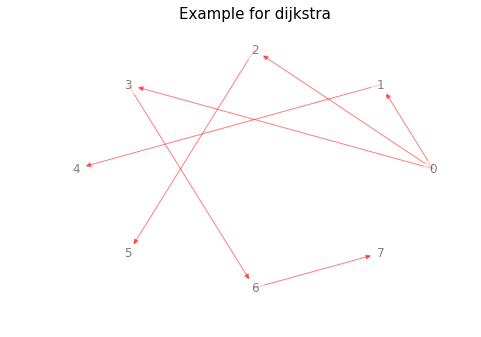

dijkstra方法寻找最短路径：
节点0到7的路径： [0, 3, 6, 7]
dijkstra方法寻找最短距离：
节点0到7的距离为： 9


In [13]:
#自定义网络
row = np.array([0,0,0,1,2,3,6])
col = np.array([1,2,3,4,5,6,7])
value = np.array([1,2,1,8,1,3,5])

print('生成一个空的有向图')
G = nx.DiGraph()
print('为这个网络添加节点...')
for i in range(0, np.size(col)+1):
    G.add_node(i)
print('在网络中添加带权中的边...')
for i in range(np.size(row)):
    G.add_weighted_edges_from([(row[i], col[i], value[i])])

print('给网络设置布局...')
pos = nx.shell_layout(G)
print('画出网络图像：')
nx.draw(G,pos,with_labels=True, node_color='white', edge_color='red', node_size=400, alpha=0.5 )
pylab.title('Example for dijkstra',fontsize=15)
pylab.show()


'''
Shortest Path with dijkstra_path
'''
print('dijkstra方法寻找最短路径：')
path = nx.dijkstra_path(G, source=0, target=7)
print('节点0到7的路径：', path)
print('dijkstra方法寻找最短距离：')
distance = nx.dijkstra_path_length(G, source=0, target=7)
print('节点0到7的距离为：', distance)